In [1]:
import pandas as pd

df = pd.read_csv('song_data.csv', encoding='utf-8')
df.drop(columns='Unnamed: 0', inplace=True)

df

,RANK,TITLE,ARTIST,YEAR,LYRICS,sentiment,profanity total,Hip-Hop/Rap,Not Hip-Hop/Rap
0,1,That's What Friends Are For,"Dionne and Friends (Dionne Warwick, Gladys Kni...",1986,never thought id feel way far im concerned im ...,0.9954,0,0,1
1,2,"Say You, Say Me",Lionel Richie,1986,say say say always thats way say say say toget...,0.8555,0,0,1
2,3,I Miss You,Klymaxx,1986,thought heard voice yesterday turned around sa...,0.9878,0,0,1
3,4,On My Own,Patti LaBelle and Michael McDonald,1986,many times said forever said love would always...,0.9065,0,0,1
4,5,Broken Wings,Mr. Mister,1986,baby dont understand cant hold others hands ti...,0.9927,0,0,1
...,...,...,...,...,...,...,...,...,...
3236,96,More Than My Hometown,Morgan Wallen,2020,girl mamas best friends whole towns rooting us...,0.9980,3,0,1
3237,97,Lovin' on You,Luke Combs,2020,dont get wrong like bobber water hookin em ree...,0.9781,0,0,1
3238,98,Said Sum,Moneybagg Yo,2020,turn yc huh ah thought broke nigga said someth...,-0.9951,32,1,0
3239,99,Slide,H.E.R.,2020,always wearin glasses dont wanna let sucker lo...,0.7707,7,1,0


In [2]:
df.tail(98)

,RANK,TITLE,ARTIST,YEAR,LYRICS,sentiment,profanity total,Hip-Hop/Rap,Not Hip-Hop/Rap
3143,1,Blinding Lights,The Weeknd,2020,yeah ive tryna call ive long enough maybe show...,0.8065,0,0,1
3144,2,Circles,Post Malone,2020,oh oh oh oh oh oh oh oh oh oh oh couldnt turn ...,0.8539,4,0,1
3145,3,The Box,Roddy Ricch,2020,pullin coupe lot told em fuck 12 fuck swat bus...,-0.9908,22,1,0
3146,4,Don't Start Now,Dua Lipa,2020,dont wanna see full 180 crazy thinking bout wa...,-0.9656,0,0,1
3147,5,Rockstar,DaBaby,2020,woo woo pull like pull baby pull oh oh oh pull...,0.9979,21,1,0
...,...,...,...,...,...,...,...,...,...
3236,96,More Than My Hometown,Morgan Wallen,2020,girl mamas best friends whole towns rooting us...,0.9980,3,0,1
3237,97,Lovin' on You,Luke Combs,2020,dont get wrong like bobber water hookin em ree...,0.9781,0,0,1
3238,98,Said Sum,Moneybagg Yo,2020,turn yc huh ah thought broke nigga said someth...,-0.9951,32,1,0
3239,99,Slide,H.E.R.,2020,always wearin glasses dont wanna let sucker lo...,0.7707,7,1,0


In [3]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.25)

x_train = pd.concat([train_set.loc[:, 'YEAR'], train_set.iloc[:, 6:8]], axis=1)
y_train = train_set.loc[:, 'sentiment']
x_test = pd.concat([test_set.loc[:, 'YEAR'], test_set.iloc[:, 6:8]], axis=1)
y_test = test_set.loc[:, 'sentiment']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


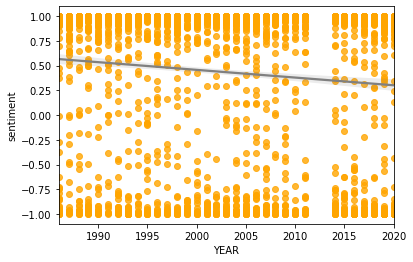

In [20]:
import seaborn as sns
# g = sns.regplot(df['Hip-Hop/Rap'], df['sentiment'], scatter_kws={"color": "orange"}, line_kws={"color": "black"})
# g.axes.set_ylim(-1.01, 1.01)
# sns.set(rc={'figure.figsize':(20,15)})
# sns.catplot(x="Hip-Hop/Rap", y="sentiment", data=df, palette=sns.color_palette(['orange', 'gray']))
g = sns.regplot(df['YEAR'], df['sentiment'], scatter_kws={"color": "orange"}, line_kws={"color": "gray"})

# sns.catplot(x="Hip-Hop/Rap", y="sentiment", kind="violin", data=df, palette=sns.color_palette(['orange', 'gray']))

In [5]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

# Ordinary Least Squares Linear Regression
ols = LinearRegression().fit(x_train, y_train)
y_pred = ols.predict(x_test)
y_pred_train = ols.predict(x_train)

print("OLS RESULTS: \n")
print("Train R-squared: ", r2_score(y_train, y_pred_train))
print("Test R-squared: ", r2_score(y_test, y_pred))

print("Train Mean Squared Error(MSE): ", mean_squared_error(y_train, y_pred_train))
print("Test Mean Squared Error(MSE): ", mean_squared_error(y_test, y_pred))

print("Train Mean Absolute Error(MAE): ", mean_absolute_error(y_train, y_pred_train))
print("Test Mean Absolute Error(MAE): ", mean_absolute_error(y_test, y_pred))

print("Train Explained Variance Score: ", explained_variance_score(y_train, y_pred_train))
print("Test Explained Variance Score: ", explained_variance_score(y_test, y_pred))
print('\n')

# Lasso Regression w/ CV
# lasso = LassoCV().fit(x_train, y_train)
# y_pred = lasso.predict(x_test)
# y_pred_train = lasso.predict(x_train)

# print("LASSO RESULTS: \n")
# print("Train R-squared: ", r2_score(y_train, y_pred_train))
# print("Test R-squared: ", r2_score(y_test, y_pred))

# print("Train Mean Squared Error(MSE): ", mean_squared_error(y_train, y_pred_train))
# print("Test Mean Squared Error(MSE): ", mean_squared_error(y_test, y_pred))

# print("Train Mean Absolute Error(MAE): ", mean_absolute_error(y_train, y_pred_train))
# print("Test Mean Absolute Error(MAE): ", mean_absolute_error(y_test, y_pred))

# print("Train Explained Variance Score: ", explained_variance_score(y_train, y_pred_train))
# print("Test Explained Variance Score: ", explained_variance_score(y_test, y_pred))
print('\n')

# Ridge Regression w/ CV
ridge = RidgeCV().fit(x_train, y_train)
y_pred = ridge.predict(x_test)
y_pred_train = ridge.predict(x_train)

print("RIDGE RESULTS: \n")
print("Train R-squared: ", r2_score(y_train, y_pred_train))
print("Test R-squared: ", r2_score(y_test, y_pred))

print("Train Mean Squared Error(MSE): ", mean_squared_error(y_train, y_pred_train))
print("Test Mean Squared Error(MSE): ", mean_squared_error(y_test, y_pred))

print("Train Mean Absolute Error(MAE): ", mean_absolute_error(y_train, y_pred_train))
print("Test Mean Absolute Error(MAE): ", mean_absolute_error(y_test, y_pred))

print("Train Explained Variance Score: ", explained_variance_score(y_train, y_pred_train))
print("Test Explained Variance Score: ", explained_variance_score(y_test, y_pred))
print('\n')

from sklearn.linear_model import ElasticNetCV
# Elastic Net Regression w/ CV
net = ElasticNetCV().fit(x_train, y_train)
y_pred = net.predict(x_test)
y_pred_train = net.predict(x_train)

print("ELASTIC NET RESULTS: \n")
print("Train R-squared: ", r2_score(y_train, y_pred_train))
print("Test R-squared: ", r2_score(y_test, y_pred))

print("Train Mean Squared Error(MSE): ", mean_squared_error(y_train, y_pred_train))
print("Test Mean Squared Error(MSE): ", mean_squared_error(y_test, y_pred))

print("Train Mean Absolute Error(MAE): ", mean_absolute_error(y_train, y_pred_train))
print("Test Mean Absolute Error(MAE): ", mean_absolute_error(y_test, y_pred))

print("Train Explained Variance Score: ", explained_variance_score(y_train, y_pred_train))
print("Test Explained Variance Score: ", explained_variance_score(y_test, y_pred))
print('\n')

OLS RESULTS: 

Train R-squared:  0.09328404026543069
Test R-squared:  0.04776147225338656
Train Mean Squared Error(MSE):  0.5989005741499202
Test Mean Squared Error(MSE):  0.6420230939354294
Train Mean Absolute Error(MAE):  0.658961253108804
Test Mean Absolute Error(MAE):  0.6810424684360658
Train Explained Variance Score:  0.09328404026543058
Test Explained Variance Score:  0.047938536765376405




RIDGE RESULTS: 

Train R-squared:  0.09328395880120632
Test R-squared:  0.04775025285911294
Train Mean Squared Error(MSE):  0.5989006279583595
Test Mean Squared Error(MSE):  0.6420306583323886
Train Mean Absolute Error(MAE):  0.6589667072161347
Test Mean Absolute Error(MAE):  0.6810524349762698
Train Explained Variance Score:  0.09328395880120655
Test Explained Variance Score:  0.047927183876060875


ELASTIC NET RESULTS: 

Train R-squared:  0.09315435900342572
Test R-squared:  0.04762413242721408
Train Mean Squared Error(MSE):  0.598986230723445
Test Mean Squared Error(MSE):  0.642115691890

In [23]:
import numpy as np

coef = np.concatenate((ols.coef_.reshape((3,1)), ridge.coef_.reshape((3,1))), axis=1)
coef = np.concatenate((coef, np.array([ols.intercept_, ridge.intercept_]).reshape((1,2))), axis=0)
indices = list(x_train.columns)
indices.append("CONST")

coefficients = pd.DataFrame(data=coef, index=indices, columns=['OLS', 'RIDGE'])
coefficients

,OLS,RIDGE
YEAR,-0.002474,-0.002478
profanity total,-0.024169,-0.024180
Hip-Hop/Rap,-0.021693,-0.021058
CONST,5.483315,5.491114
